# Squid Game Effect ETL & EDA
<a id="toc"></a>
Table of Contents
* [1.0 Introduction & Methodology - ETL & EDA](#section_01)
* [2.0 Data Sources & ETL Process](#section_02)
  * [2.1 Duolingo 2024 Language Report](#section_02_01)
  * [2.2 Google Trends Timeline & Region Data For Past 5 years, Squid Game 1 & Squid Game 2 and Search Topic 'Korea Drama'](#section_02_02)
  * [2.3 My Drama List: K-Drama](#section_02_03)
  * [2.4 Netflix Data (AARCHVED)](#section_02_04)
* [3.0 Part 1 The Mystery - Unexpected Global Interest()](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_
* [4.0 Part 2 The Correlation Evidence](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_
* [5.0 Part 3 The Smoking Gun - Squid Game Experiments](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_
* [6.0 Part 4 The Geographic Proof](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_
* [7.0 Part 5 The Sustained Wave - Beyond Viral Moments](ARCHIVED)(../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_
* [8.0 Limitations & Conclusions](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_
* [9.0 Credits](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_

--------------------------------

<a id="section_01"></a>
## 1.0 Introduction - ETL & ETL
For decades, language learning was predictable: English, Spanish and French were the languages of choice. Hoowever, in 2018, Duolingo's data detectives spotted an anomaly. They noticed that interests in Korean culture and language are surging in countries with no historical ties to Korea.

Their hyoothesis? The K-pop and K-drama effect.  Duolinga began weaving famous K-drama lines into lessons. Their latest campaign of "Learn Korean or Else" was a partnership with Netflix in late 2024 with the release of "Squid Game Season 2".

This project aims to start on a data trial to see if this is just a corporate intuition based on fads or that binge-watching K-drama is indeed becoming the world's newest Korean classrooms.

In this notebook, we are looking at the ETL/EDA of the folowing datasets:
* duolingo
* google trends timeline
* google trends regional
* My Drama List for K dramas
* Netflix list of shows

The analysis of the Squid Game phenonment (if any) is located in a separate notebook:
* [Squid Game Effect - The Analysis](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_

### 1.1 Get all the necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # sets a white background with grid lines 
import plotly.express as px

In [4]:
# System and OS related tasks
import sys
import os
import importlib
# Add the project root to Python path
project_root = os.path.abspath('..')
sys.path.insert(0, project_root)

# path to directories
processed_dir = '../data/processed'

------------------------

<a id="section_02"></a>
## 2.0 Data Sources & ETL Process


<a id="section_02_01"></a>
### 2.1 Duolingo 2024 Language Report
* [Duolingo 2024 Report](https://blog.duolingo.com/2024-duolingo-language-report/
)
* Data Source: [Google Docs](https://docs.google.com/spreadsheets/d/1CndYC5ZovYfmPuMN9T9Jxfa4CQXOzZrfQ2kAUaWG1ZU/edit?ref=blog.duolingo.com&gid=532174835#gid=532174835)

#### 2.1.1 EDA of the Duolingo's Data

In [5]:
duolingo_filepath = '../data/raw/Duolingo Language Report [2020-2024]_ Public data.xlsx'
duolingo_df = pd.read_excel(
        duolingo_filepath, 
        sheet_name='Data by country', 
        skiprows=1)
# Rename the first column to "country"
duolingo_df = duolingo_df.rename(columns={duolingo_df.columns[0]: 'country'})


In [6]:
# Display the first few rows to understand the structure
print("DataFrame shape:", duolingo_df.shape)
print("\nFirst few rows:")
print(duolingo_df.head())

# Check column names
print("\nColumn names:")
print(duolingo_df.columns.tolist())


DataFrame shape: (193, 11)

First few rows:
       country pop1_2020 pop2_2020 pop1_2021 pop2_2021 pop1_2022 pop2_2022  \
0  Afghanistan   English   Spanish   English   Turkish    German   English   
1      Albania    German   English    German   English    German   English   
2      Algeria   English    French   English    French   English    French   
3      Andorra   English    French   English    French   English    French   
4       Angola   English    French   English    French   English    French   

  pop1_2023 pop2_2023 pop1_2024 pop2_2024  
0   English    German   English    German  
1    German   English   English    German  
2   English    French   English    French  
3   English    French   English   Spanish  
4   English    French   English    French  

Column names:
['country', 'pop1_2020', 'pop2_2020', 'pop1_2021', 'pop2_2021', 'pop1_2022', 'pop2_2022', 'pop1_2023', 'pop2_2023', 'pop1_2024', 'pop2_2024']


In [7]:
# Get all columns that contain language data (pop1 and pop2 for each year)
year_columns = [col for col in duolingo_df.columns if col != 'country']

In [8]:
# Create an empty set to store all unique values
unique_languages = set()

# Loop through columns and add unique values
for col in year_columns:
        unique_in_col = set(duolingo_df[col].dropna().unique())
        unique_languages.update(unique_in_col)
        

print("All unique languages across all year columns:")
sorted(unique_languages)


All unique languages across all year columns:


['Arabic',
 'Chinese',
 'Danish',
 'English',
 'Finnish',
 'French',
 'German',
 'Guarani',
 'Hebrew',
 'Hindi',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Norwegian',
 'Portuguese',
 'Russian',
 'Spanish',
 'Swahili',
 'Swedish',
 'Turkish']

#### 2.1.2 Create a DataFrame with Korean Language Learning Countries

In [9]:
# Filter rows where any language column contains "Korean"
duolingo_korean_countries_df = duolingo_df[duolingo_df[year_columns].apply(
    lambda x: x.str.contains('Korean').any(), axis=1)]

tot_duolingo_country = duolingo_df['country'].value_counts().sum()
tot_korean_country = duolingo_korean_countries_df['country'].value_counts().sum()
print(f"* There are {tot_duolingo_country} countries in Duolingo's data")
print(f"* However only {tot_korean_country/tot_duolingo_country * 100:.2f}% of them or {tot_korean_country} countries have Korean as one of the top 2 most popular languages.")
print("* These countries with Korean are as follows:")
duolingo_korean_countries_df['country'].value_counts()

* There are 193 countries in Duolingo's data
* However only 7.25% of them or 14 countries have Korean as one of the top 2 most popular languages.
* These countries with Korean are as follows:


country
Bangladesh     1
Bhutan         1
Brunei         1
Indonesia      1
Japan          1
Kiribati       1
Malaysia       1
Mongolia       1
Myanmar        1
Nepal          1
Pakistan       1
Philippines    1
South Korea    1
Thailand       1
Name: count, dtype: int64

##### 🧐🕵🏻‍♂️ Conclusion:
* The 14 countries having Korean as their top 2 langauges to learn are mostly in Asia. Hence, it does not give the impression that learning Korean language is a "global" phenomenon.
* Perhaps this is because Duolingo's data only shows the top 2 most favourite languagues in each country which ignores countries with korean langauge as their 3rd or 4th most popular languages to learn
* Perhaps we should look at Google Trend regional data to see if it is indeed a global phenomenon.

#### 2.1.3 Export to csv

In [10]:
duolingo_korean_countries_df.to_csv(f'{processed_dir}/duolingo_korean_countries_df.csv', index=False)
print(f"Exported: {processed_dir}/duolingo_korean_countries_df.csv")

Exported: ../data/processed/duolingo_korean_countries_df.csv


###### [↩️ Back to Table of Contents](#toc)

-----------------

<a id="section_02_02"></a>
### 2.2 Google Trends Timeline & Region Data For Squid Game 1 & Squid Game 2
* _Data Collected on 1 Nov. 2025_
* 1 year period covering 9 months before the release of each show and 3 months after
    * Squid Game 1 was released on Netflix on 17 September 2021
    * Squid Game 2 was released on Netflix on 26 December 2024
* _Data Collected on 1 Nov. 2025_


In [12]:
# Now import
from src.etl.google_etl import google_filepaths, load_timeline_data, load_geo_data

# Test the function
print("Function imported successfully!")

Function imported successfully!


#### 2.2.1 Google Trends Timeline Data For Past 5 years, Squid Game 1 & Squid Game 2

In [13]:
kdrama_past5yr_df = load_timeline_data(google_filepaths['timeline']['kdrama']['past5yr'], 'kdrama_past5yr')
kdrama_squidgame1_df = load_timeline_data(google_filepaths['timeline']['kdrama']['squidgame1'], 'kdrama_squidgame1')
kdrama_squidgame2_df = load_timeline_data(google_filepaths['timeline']['kdrama']['squidgame2'], 'kdrama_squidgame2')

learn_korean_past5yr_df = load_timeline_data(google_filepaths['timeline']['learn_korean']['past5yr'], 'learn_korean_past5yr')
learn_korean_squidgame1_df = load_timeline_data(google_filepaths['timeline']['learn_korean']['squidgame1'], 'learn_korean_squidgame1')
learn_korean_squidgame2_df = load_timeline_data(google_filepaths['timeline']['learn_korean']['squidgame2'], 'learn_korean_squidgame2')

✅ Successfully loaded kdrama_past5yr data: (261, 2)
📈 kdrama_past5yr's Index DateTime Column sorted: True. So no sorting is required
📊 kdrama_past5yr Preview:
   Shape: (261, 1)
   Index Column: week
   Date range: 01-Nov-2020 to 26-Oct-2025
   First 5 rows:
            kdrama_past5yr
week                      
2020-11-01               5
2020-11-08               5
2020-11-15               6
2020-11-22               7
2020-11-29               6
✅ Successfully loaded kdrama_squidgame1 data: (53, 2)
📈 kdrama_squidgame1's Index DateTime Column sorted: True. So no sorting is required
📊 kdrama_squidgame1 Preview:
   Shape: (53, 1)
   Index Column: week
   Date range: 27-Dec-2020 to 26-Dec-2021
   First 5 rows:
            kdrama_squidgame1
week                         
2020-12-27                 75
2021-01-03                 81
2021-01-10                 85
2021-01-17                 75
2021-01-24                 78
✅ Successfully loaded kdrama_squidgame2 data: (53, 2)
📈 kdrama_squidgame2's 

#### 2.2.2 Google Trends Region Data For Past 5 years, Squid Game 1 & Squid Game 2

In [14]:
kdrama_geo_past5yr_df = load_geo_data(google_filepaths['geo']['kdrama']['past5yr'], 'kdrama_geo_past5yr')
kdrama_geo_squidgame1_df = load_geo_data(google_filepaths['geo']['kdrama']['squidgame1'], 'kdrama_geo_squidgame1')
kdrama_geo_squidgame2_df = load_geo_data(google_filepaths['geo']['kdrama']['squidgame2'], 'kdrama_geo_squidgame2')

learn_korean_geo_past5yr_df = load_geo_data(google_filepaths['geo']['learn_korean']['past5yr'], 'learn_korean_geo_past5yr')
learn_korean_geo_squidgame1_df = load_geo_data(google_filepaths['geo']['learn_korean']['squidgame1'], 'learn_korean_geo_squidgame1')
learn_korean_geo_squidgame2_df = load_geo_data(google_filepaths['geo']['learn_korean']['squidgame2'], 'learn_korean_geo_squidgame2')

✅ Successfully loaded kdrama_geo_past5yr data: (250, 2)
   No duplicate country entries found.

📊 kdrama_geo_past5yr Preview:
   Shape: (250, 2)
   First 5 rows:
       country  kdrama_geo_past5yr
0      Mayotte                 0.0
1   Madagascar               100.0
2       Bhutan                 0.0
3  Philippines                59.0
4     Djibouti                 0.0
✅ Successfully loaded kdrama_geo_squidgame1 data: (250, 2)
   No duplicate country entries found.

📊 kdrama_geo_squidgame1 Preview:
   Shape: (250, 2)
   First 5 rows:
       country  kdrama_geo_squidgame1
0  Philippines                  100.0
1       Brunei                   76.0
2   Madagascar                   76.0
3     Cambodia                   58.0
4    Mauritius                   31.0
✅ Successfully loaded kdrama_geo_squidgame2 data: (250, 2)
   No duplicate country entries found.

📊 kdrama_geo_squidgame2 Preview:
   Shape: (250, 2)
   First 5 rows:
      country  kdrama_geo_squidgame2
0  Madagascar              

#### 2.2.3 Goggle Trends for Search Topic "Korean Drama"

In [15]:
korean_drama_past5yr_df = load_timeline_data('../data/raw/googletrends_01_multitimeline_koreandrama_5years.csv', 'korean_drama_past5yr')


✅ Successfully loaded korean_drama_past5yr data: (261, 2)
📈 korean_drama_past5yr's Index DateTime Column sorted: True. So no sorting is required
📊 korean_drama_past5yr Preview:
   Shape: (261, 1)
   Index Column: week
   Date range: 01-Nov-2020 to 26-Oct-2025
   First 5 rows:
            korean_drama_past5yr
week                            
2020-11-01                    64
2020-11-08                    67
2020-11-15                    67
2020-11-22                    68
2020-11-29                    65


#### 2.2.4 Export Google Trends DFs to CSVs

In [16]:
dataframes_temp = {
    "kdrama_past5yr": kdrama_past5yr_df,
    "learn_korean_past5yr": learn_korean_past5yr_df,
    "kdrama_squidgame1": kdrama_squidgame1_df,
    "learn_korean_squidgame1": learn_korean_squidgame1_df,
    "kdrama_squidgame2": kdrama_squidgame2_df,
    "learn_korean_squidgame2": learn_korean_squidgame2_df,
    "korean_drama_past5yr": korean_drama_past5yr_df,
}

# Export all timeline data keeping the index
for name, df in dataframes_temp.items():
    if df is not None:
        filename = f"../data/processed/{name}.csv"
        df.to_csv(filename)
        print(f"✅ Exported {name}")

✅ Exported kdrama_past5yr
✅ Exported learn_korean_past5yr
✅ Exported kdrama_squidgame1
✅ Exported learn_korean_squidgame1
✅ Exported kdrama_squidgame2
✅ Exported learn_korean_squidgame2
✅ Exported korean_drama_past5yr


In [17]:
dataframes_geo_temp = {
    "kdrama_geo_past5yr": kdrama_geo_past5yr_df,
    "learn_korean_geo_past5yr": learn_korean_geo_past5yr_df,
    "kdrama_geo_squidgame1": kdrama_geo_squidgame1_df,
    "learn_korean_geo_squidgame1": learn_korean_geo_squidgame1_df,
    "kdrama_geo_squidgame2": kdrama_geo_squidgame2_df,
    "learn_korean_geo_squidgame2": learn_korean_geo_squidgame2_df
}

# Export all geo data dropping the index
for name, df in dataframes_temp.items():
    if df is not None:
        filename = f"../data/processed/{name}.csv"
        df.to_csv(filename, index=False)
        print(f"✅ Exported {name}")

✅ Exported kdrama_past5yr
✅ Exported learn_korean_past5yr
✅ Exported kdrama_squidgame1
✅ Exported learn_korean_squidgame1
✅ Exported kdrama_squidgame2
✅ Exported learn_korean_squidgame2
✅ Exported korean_drama_past5yr


###### [↩️ Back to Table of Contents](#toc)

-----------------

<a id="section_02_03"></a>
### 2.3 My Drama List: K-Drama
* source: [REDHATA on Kaggle](https://www.kaggle.com/datasets/redhata/korean-drama-dataset-2010-2025-2600-titles)

This dataset can hopefully give insight into 
* Identifying the trend of Korean shows released on Netflix (or other platforms from various parts of the world?) over the years
* Looking at the shows score to see if interests in Korea shows is sustained

#### 2.3.1 EDA
* The Aired column has values like 'May 14, 2021' or 'Sep 25, 2023 - Nov 14, 2023' or 'Jun 9, 2025 - ?'
* Column has no missing values 

In [18]:
# Read in CSV file
kdramamdl_df = pd.read_csv('../data/raw/KdramadatasetMDL.csv')

# Explore the data
print(kdramamdl_df.info())
print(kdramamdl_df.columns.tolist())
print(kdramamdl_df.head())
# Check for missing values
print(kdramamdl_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   URL               2652 non-null   object 
 1   Title             2652 non-null   object 
 2   Synopsis          2472 non-null   object 
 3   Screenwriters     1660 non-null   object 
 4   Directors         1716 non-null   object 
 5   Genres            2645 non-null   object 
 6   Tags              2652 non-null   object 
 7   Cast              2542 non-null   object 
 8   Episodes          2652 non-null   float64
 9   Aired             2652 non-null   object 
 10  Aired On          2348 non-null   object 
 11  Original Network  2151 non-null   object 
 12  Duration          2618 non-null   object 
 13  Content Rating    2652 non-null   object 
 14  Score             2652 non-null   object 
 15  Ranked            2652 non-null   object 
 16  Popularity        2652 non-null   object 


In [19]:
# Drop unuseful columns
## 'Aired On col' = day of the week. 'Duration' col = how long is the show
## 'Ranked' & 'Popularity' & Watchers numbers are also not as useful as 'Score'
columns_to_drop = ['URL', 'Synopsis', 'Screenwriters', 'Directors', 'Genres', 'Tags', 
                   'Cast', 'Episodes', 'Aired On', 'Duration', 'Content Rating', 'Ranked', 'Popularity', 'Watchers']

kdramamdl_df = kdramamdl_df.drop(columns=columns_to_drop)

# Explore the data
print(kdramamdl_df.info())
print(kdramamdl_df.columns.tolist())
print(kdramamdl_df.head())
# Check for missing values
print(kdramamdl_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             2652 non-null   object
 1   Aired             2652 non-null   object
 2   Original Network  2151 non-null   object
 3   Score             2652 non-null   object
 4   Watch Platforms   1750 non-null   object
dtypes: object(5)
memory usage: 103.7+ KB
None
['Title', 'Aired', 'Original Network', 'Score', 'Watch Platforms']
                            Title                        Aired  \
0  When Life Gives You Tangerines   Mar 7, 2025 - Mar 28, 2025   
1            Twinkling Watermelon  Sep 25, 2023 - Nov 14, 2023   
2                  Move to Heaven                 May 14, 2021   
3      Hospital Playlist Season 2  Jun 17, 2021 - Sep 16, 2021   
4               Weak Hero Class 1                 Nov 18, 2022   

  Original Network                         Score  \
0        

#### 2.3.2 Cleaning The 'Aired' Column
* The Aired column has values like 'May 14, 2021' or 'Sep 25, 2023 - Nov 14, 2023' or 'Jun 9, 2025 - ?'
* Column has no missing values 

In [20]:
# taking only the last 4 character as the year
kdramamdl_df['Year_Simple'] = kdramamdl_df['Aired'].str[-4:]
kdramamdl_df['Year_Simple'].value_counts()

Year_Simple
2021    259
2019    246
2022    234
2018    219
2020    218
2017    190
2024    189
2023    183
2016    173
2015    143
2014    129
2025    118
2012    109
2013     97
2011     76
2010     62
 - ?      7
Name: count, dtype: int64

In [21]:
# Isolate the problematic entries with "- ?"
# it looks like the shows started but the end date is unknown
# so maybe it is best to get the year from the first date as the true start date
problematic_entries = kdramamdl_df[kdramamdl_df['Aired'].str[-4:] == " - ?"]
print(problematic_entries['Aired'].unique())

['Jun 9, 2025 - ?' 'Apr 28, 2025 - ?' 'Feb 28, 2023 - ?'
 'Aug 18, 2019 - ?' 'Apr 14, 2025 - ?' 'May 9, 2022 - ?' 'Nov 2, 2021 - ?']


In [22]:
# import function from python script
from src.etl.kdramamdl_etl import get_start_year

In [23]:
# Clean the Aired col
kdramamdl_df['Release_Year'] = kdramamdl_df['Aired'].apply(get_start_year)
kdramamdl_df['Release_Year'] = pd.to_numeric(kdramamdl_df['Release_Year'], errors='coerce')
kdramamdl_df['Release_Year'].value_counts()

Release_Year
2021    260
2019    247
2022    235
2018    219
2020    218
2017    190
2024    189
2023    184
2016    173
2015    143
2014    129
2025    121
2012    109
2013     97
2011     76
2010     62
Name: count, dtype: int64

In [24]:
# drop the test column for figuring out the release year
kdramamdl_df = kdramamdl_df.drop(columns='Year_Simple')

#### 2.3.3 Cleaning The 'Score' Column
* The Aired column has values like '9.0 (scored by 2 users)' or '10.0 (scored by 2 users)'
* Column has no missing values 

In [25]:
# Look at the typical values
kdramamdl_df['Score'].value_counts()

Score
9.0 (scored by 2 users)        6
7.3 (scored by 10 users)       5
10.0 (scored by 2 users)       4
7.0 (scored by 15 users)       4
6.5 (scored by 9 users)        4
                              ..
7.7 (scored by 388 users)      1
7.6 (scored by 464 users)      1
7.7 (scored by 1,724 users)    1
7.7 (scored by 3,720 users)    1
4.2 (scored by 5 users)        1
Name: count, Length: 2462, dtype: int64

##### 2.3.2.1 Creating a User Rating Column from Score

In [26]:
# Check for Problematic rows
problematic_scores = kdramamdl_df[kdramamdl_df['Score'].str.split(' ').str[0] == 'N/A']
print("Problematic score rows:")
print(problematic_scores[['Title', 'Score']])

Problematic score rows:
                     Title                    Score
1914            Pianissimo  N/A (scored by 0 users)
2149          Blind (2017)  N/A (scored by 0 users)
2157  Crow Building (2015)  N/A (scored by 0 users)


In [27]:
# replace these 3 rogue rows with 'N/A (scored by 0 users)'
kdramamdl_df['Score_Cleaned']= kdramamdl_df['Score'].str.replace('N/A', '0') 

# Verify the replacement
problematic_scores = kdramamdl_df[kdramamdl_df['Score_Cleaned'].str.split(' ').str[0] == 'N/A']
print("Problematic score rows:")
print(problematic_scores[['Title', 'Score', 'Score_Cleaned']].value_counts())

Problematic score rows:
Series([], Name: count, dtype: int64)


In [28]:
# Simple lambda for score (very straightforward)
kdramamdl_df['Score_Ratings'] = kdramamdl_df['Score_Cleaned'].apply(
    lambda x: float(x.split(' ')[0])
)

kdramamdl_df['Score_Ratings'].value_counts().head()

Score_Ratings
7.3    170
7.1    162
7.0    161
7.2    156
7.4    154
Name: count, dtype: int64

##### 2.3.2.2 Creating a User Rating Base Column from Score

In [29]:
# import function from python script
from src.etl.kdramamdl_etl import get_users_base

In [30]:
kdramamdl_df['Score_User_Base'] = kdramamdl_df['Score'].apply(get_users_base).astype(int)
kdramamdl_df['Score_User_Base'].value_counts()

Score_User_Base
4       39
7       36
3       34
6       31
8       26
        ..
1211     1
6242     1
9306     1
6394     1
122      1
Name: count, Length: 1853, dtype: int64

#### 2.3.4 Review the Score_Ratings and Score_User_Base Columns

##### 2.3.4.1 Review the Score_Ratings

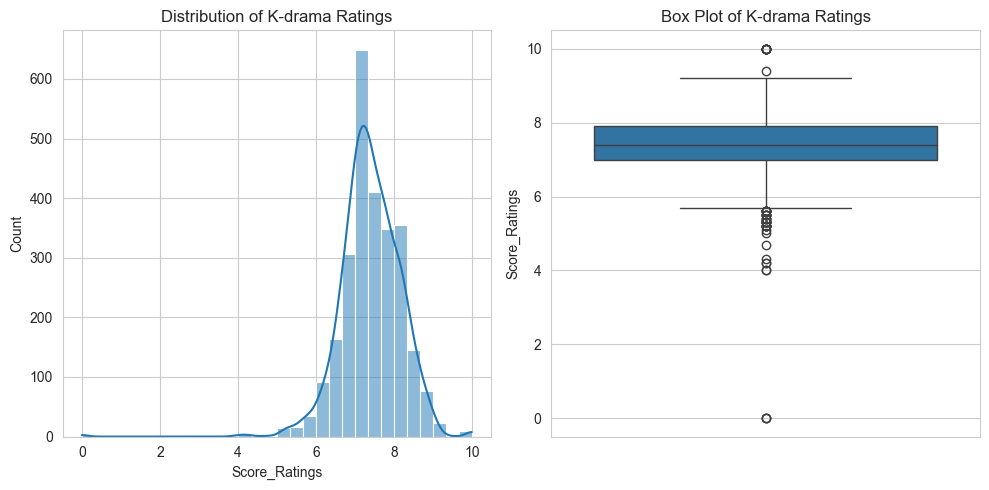

In [31]:
# Distribution of Score Ratings
fig, axes = plt.subplots(1, 2,figsize=(10,5))

sns.histplot(data=kdramamdl_df, x='Score_Ratings', kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribution of K-drama Ratings')


sns.boxplot(data=kdramamdl_df, y=kdramamdl_df['Score_Ratings'], ax=axes[1])
axes[1].set_title('Box Plot of K-drama Ratings')

plt.tight_layout()
plt.show()

##### 2.3.4.2 Review the Score_User_Base
* The user base of score ratings has quite a large range of values 
  * so I've applied the log transformation to smooth it out.
* The box plot shows a lot of outliers
  * This is expected as one would find that a hugely popular show should have a big user base   
  * This is also why I've applied log transformation to smooth it out. 

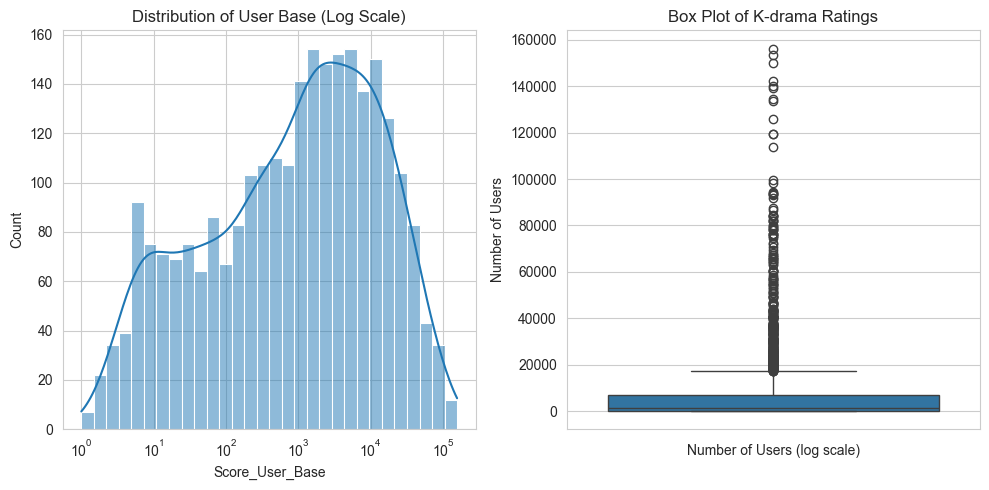

In [32]:
# User base distribution
# apply log scale because of extreme ranges
# The box plot 
fig, axes = plt.subplots(1, 2,figsize=(10,5))

sns.histplot(
        kdramamdl_df[kdramamdl_df['Score_User_Base'] > 0],
        x='Score_User_Base', 
        kde=True, 
        bins=30, 
        log_scale=True,
        ax=axes[0]
        )
axes[0].set_title('Distribution of User Base (Log Scale)')
plt.xlabel('Number of Users (log scale)')


sns.boxplot(data=kdramamdl_df, y=kdramamdl_df['Score_User_Base'], ax=axes[1])
axes[1].set_title('Box Plot of K-drama Ratings')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()

In [33]:
# Quick statistical overview
print("Score Ratings Summary:")
print(kdramamdl_df['Score_Ratings'].describe())
print(f"\nMissing scores: {kdramamdl_df['Score_Ratings'].isnull().sum()}")

print("\nUser Base Summary:")
print(kdramamdl_df['Score_User_Base'].describe())
print(f"Dramas with 0 users: {(kdramamdl_df['Score_User_Base'] == 0).sum()}")

Score Ratings Summary:
count    2652.000000
mean        7.401998
std         0.768672
min         0.000000
25%         7.000000
50%         7.400000
75%         7.900000
max        10.000000
Name: Score_Ratings, dtype: float64

Missing scores: 0

User Base Summary:
count      2652.000000
mean       7639.620664
std       16545.500814
min           0.000000
25%          90.000000
50%        1228.500000
75%        6982.000000
max      156233.000000
Name: Score_User_Base, dtype: float64
Dramas with 0 users: 3


#### 2.3.5 Clean the platfom columns
* There are 2 columns of interest: 'Original Networks' and 'Watch Platforms'
* but the comma separated values in these 2 columns requires some cleaning.
* I think for the analysis, we just need a new column to indicated whether a show is shown in non-korean platform/network ==> i.e. a Boolean.

In [34]:
kdramamdl_df.columns
print(kdramamdl_df['Original Network'].value_counts())
print(kdramamdl_df['Watch Platforms'].value_counts())


Original Network
SBS                          255
MBC                          252
KBS2                         249
Naver TV Cast                236
tvN                          228
                            ... 
SBS, Sohu TV                   1
Amazon Prime                   1
MBC, Naver TV Cast, vLive      1
AbemaTV                        1
QTV                            1
Name: count, Length: 105, dtype: int64
Watch Platforms
Netflix                                            156
Viki                                               140
Viki, Kocowa                                       106
Kocowa                                              56
KBS World                                           41
                                                  ... 
Netflix, WeTV, Viki, iQIYI, VIU Indonesia, Hulu      1
Netflix, VIU Indonesia                               1
Viki, TVING, Tubi                                    1
Disney+ Hotstar, Netflix, Viki                       1
Apple TV, Wavve

In [35]:
def get_unique_networks_platforms(df, columnname):
    all_platforms = set()
    for platforms in df[columnname].dropna():
        # Split by comma and strip whitespace
        platform_list = [p.strip() for p in platforms.split(',')]
        all_platforms.update(platform_list)
    return sorted(list(all_platforms))


unique_watch_platforms = get_unique_networks_platforms(kdramamdl_df, 'Watch Platforms')
print("Unique Watch Platforms:")
for platform in unique_watch_platforms:
    print(f"- {platform}")
print(f"\nTotal unique watch platforms: {len(unique_watch_platforms)}")

unique_original_networks = get_unique_networks_platforms(kdramamdl_df, 'Original Network')
print("Unique Original Networks:")
for networks in unique_original_networks:
    print(f"- {networks}")
print(f"\nTotal Unique Original Networks: {len(unique_original_networks)}")

Unique Watch Platforms:
- 72sec TV
- ARIRANG K-POP
- Abema TV
- Apple TV
- AsianCrush
- CheezeFilm
- China Huace TV
- Dingo K-Drama
- Disney+
- Disney+ Hotstar
- Emotional Click
- HBO Max
- Hulu
- K-DRAMA
- KBS Drama
- KBS Drama Classic
- KBS World
- KIK TV
- KOK TV
- KUKAN
- Kakao TV
- Kocowa
- LINE TV
- Lemino
- Lululala Story Lab
- Netflix
- Paramount+
- PlayList Global
- Prime Video
- Roku
- SBS VOD
- SBS World
- STUDIO DIA
- Studio LuluLala
- TVING
- TVer
- Tooniverse
- Tubi
- VIU Indonesia
- Vanilasee
- Viki
- WHYNOT TV
- Wavve
- WeTV
- iQIYI
- iWant TFC
- iflix
- tvN D STORY
- 배티비 (BAETV)
- 옛드 : 옛날 드라마 [드라맛집]
- 채널 십오야 15Ya

Total unique watch platforms: 51
Unique Original Networks:
- AbemaTV
- Alwayz
- Amazon Prime
- BS TV Tokyo
- Bump
- CGV
- COUPANG TV
- Channel A
- DRAMAcube
- Daum Kakao TV
- Disney+
- DramaX
- E-Channel
- EBS
- ENA
- FTV
- Genie TV
- KBS Joy
- KBS1
- KBS2
- LINE TV
- MBC
- MBC Dramanet
- MBC QueeN
- MBC every1
- MBN
- Mnet
- Naver TV Cast
- Netflix
- O'live


In [36]:
all_unique_platforms_networks = sorted(set(unique_watch_platforms + unique_original_networks))

print("All Unique Platforms & Networks:")
for item in all_unique_platforms_networks:
    print(f"- {item}")
print(f"\nTotal unique items: {len(all_unique_platforms_networks)}")

All Unique Platforms & Networks:
- 72sec TV
- ARIRANG K-POP
- Abema TV
- AbemaTV
- Alwayz
- Amazon Prime
- Apple TV
- AsianCrush
- BS TV Tokyo
- Bump
- CGV
- COUPANG TV
- Channel A
- CheezeFilm
- China Huace TV
- DRAMAcube
- Daum Kakao TV
- Dingo K-Drama
- Disney+
- Disney+ Hotstar
- DramaX
- E-Channel
- EBS
- ENA
- Emotional Click
- FTV
- Genie TV
- HBO Max
- Hulu
- K-DRAMA
- KBS Drama
- KBS Drama Classic
- KBS Joy
- KBS World
- KBS1
- KBS2
- KIK TV
- KOK TV
- KUKAN
- Kakao TV
- Kocowa
- LINE TV
- Lemino
- Lululala Story Lab
- MBC
- MBC Dramanet
- MBC QueeN
- MBC every1
- MBN
- Mnet
- Naver TV Cast
- Netflix
- O'live
- OBS
- OCN
- Oksusu
- On Style
- Paramount+
- PlayList Global
- Prime Video
- QTV
- Roku
- SBS
- SBS Plus
- SBS VOD
- SBS World
- STUDIO DIA
- SUPER ACTION
- Seezn
- Shortime
- Sohu TV
- Studio LuluLala
- TV Chosun
- TVING
- TVer
- Tencent Video
- Tooniverse
- Tubi
- U+ Mobile TV
- VIU Indonesia
- Vanilasee
- Vigloo
- Viki
- Viu
- WHYNOT TV
- Watcha
- Wavve
- WeTV
- XTM


In [37]:
# These are the manually identified Foreign/International Platforms
## Global streaming services (Netflix, Disney+, Amazon Prime, Apple TV, etc.)
# Regional streaming services (Viki, Viu, iQIYI, WeTV, etc.)
# Japanese platforms (AbemaTV, TVer, Lemino, BS TV Tokyo)
# Chinese platforms (Tencent Video, Sohu TV, China Huace TV)
# Other international (Hulu, HBO Max, Paramount+, etc.)

non_korean_platforms = [
    'Abema TV', 'AbemaTV', 'Amazon Prime', 'Apple TV', 'AsianCrush', 
    'BS TV Tokyo', 'China Huace TV', 'Disney+', 'Disney+ Hotstar', 
    'HBO Max', 'Hulu', 'LINE TV', 'Netflix', 'Paramount+', 'Prime Video', 
    'Roku', 'Sohu TV', 'TVer', 'Tencent Video', 'Tubi', 'VIU Indonesia', 
    'Viki', 'Viu', 'WeTV', 'iQIYI', 'iQiyi', 'iWant TFC', 'iflix'
]

non_korean_platforms_lower = []
for platform in non_korean_platforms:
    non_korean_platforms_lower.append(platform.lower())

In [38]:
# Initialize the new column
kdramamdl_df['non_korean_platform'] = 0

# function to check the column values against the non_korean_platforms_lower
def check_foreign(platform_str):
    # if the column is NaN then just return 0
    if pd.isna(platform_str):
        return 0
    # split the string by ',' and the strip all trailing spaces and convert to lower
    # put cleaned string in a list
    platforms = [p.strip().lower() for p in platform_str.split(',')]
    # loop through the list to match against the non_korean_platforms_lower 
    for platform in platforms:
        if platform in non_korean_platforms_lower:
            return 1
    return 0

# Apply to both columns and use logical OR
has_foreign_watch = kdramamdl_df['Watch Platforms'].apply(check_foreign)
has_foreign_network = kdramamdl_df['Original Network'].apply(check_foreign)

# Set to 1 if either column has foreign platforms
kdramamdl_df['non_korean_platform'] = (has_foreign_watch | has_foreign_network).astype(int)

print(f"Final count: {kdramamdl_df['non_korean_platform'].sum()}/{len(kdramamdl_df)}")
print(kdramamdl_df.head())

Final count: 1465/2652
                            Title                        Aired  \
0  When Life Gives You Tangerines   Mar 7, 2025 - Mar 28, 2025   
1            Twinkling Watermelon  Sep 25, 2023 - Nov 14, 2023   
2                  Move to Heaven                 May 14, 2021   
3      Hospital Playlist Season 2  Jun 17, 2021 - Sep 16, 2021   
4               Weak Hero Class 1                 Nov 18, 2022   

  Original Network                         Score  \
0          Netflix  9.4 (scored by 36,925 users)   
1              tvN  9.2 (scored by 74,669 users)   
2          Netflix  9.1 (scored by 64,401 users)   
3              tvN  9.1 (scored by 41,964 users)   
4            Wavve  9.1 (scored by 82,626 users)   

                       Watch Platforms  Release_Year  \
0                              Netflix          2025   
1           Viki, VIU Indonesia, TVING          2023   
2                              Netflix          2021   
3                       Netflix, TVING     

#### 2.3.6 Export cleaned data

In [39]:
kdramamdl_df.to_csv(f'{processed_dir}/kdramamdl_df.csv', index=False)
print(f"Exported: {processed_dir}/kdramamdl_df.csv")

Exported: ../data/processed/kdramamdl_df.csv


###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_02_04"></a>
### 2.4 Netflix Data (ARCHIVED)
* source: [Netflix Movies & TC shows dataset on Kaggle](https://www.kaggle.com/datasets/zubairamuti/netflix-movies-and-tv-shows-dataset)

Work on this dataset is archived because
* There is sufficient data from MyDramaList 
* but it can be used for future analysis

###### [↩️ Back to Table of Contents](#toc)

--------------------------------